In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# Problem Definition
# Developing Deep Learning and Machine Learning Models for Text Classification

This model can assist Swahili online news platforms in automatically organizing articles, making it easier for readers to locate relevant news. Furthermore, it will support efforts to enhance Swahili language representation in digital applications and online platforms.

# Steps to accomplish our task




# The following steps outline the experimental design to complete this project:

1. Dataset Loading: Importing and preparing the dataset for analysis.
2. Feature and Target Variable Analysis: Understanding the structure and significance of the features and target labels.
3. Data Preprocessing: Cleaning and refining the dataset to ensure quality and consistency.
4. WordCloud Visualization: Generating word clouds to analyze common words in the dataset.
5. Label Encoding: Converting categorical labels into numerical representations.
6. Word Embedding: Transforming textual data into vector representations for model input.
7. Model Development: Machine Learning algorithms, including:
* a)Support Vector Machine(SVM)
* b) Random Forest
* c) Naive Bayes
8. Model Validation: Evaluating the models to assess performance and accuracy.
9. Conclusion: Summarizing findings and insights from the experiment
10. Report writing



#Data descriptions

# About Data
##The dataset describes 6439 rows of news from different sources in Tanzania.These news are in 5 different news categories from national news to entertainment news.

Our goal is to accurately classify each swahili news content into five specified categories below:

1. Kitaifa (National)
2. Kimataifa (International)
3. Biashara (Business)
4. Michezo (Sports)
5. Burudani (Entertainment)

URL: https://zindi.africa/competitions/swahili-news-classification/data


#Loading the Data

In [3]:
train = pd.read_csv('/content/drive/MyDrive/nlp_2/NLP_FINAL_PROJECT_2025/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/nlp_2/NLP_FINAL_PROJECT_2025/Test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/nlp_2/NLP_FINAL_PROJECT_2025/SampleSubmission.csv')
variable_definitions = pd.read_csv('/content/drive/MyDrive/nlp_2/NLP_FINAL_PROJECT_2025/VariableDefinitions.csv')

In [4]:
train.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [5]:
variable_definitions.head()

,Variable Definitions,Unnamed: 1
0,id,Unique identifier for each news
1,content,Full details about particular news
2,Category,The specific category of a particular news


In [6]:
sample_submission.head()

,swahili_id,kitaifa,michezo,biashara,kimataifa,burudani
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,0,0,0,0,0
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,0,0,0,0,0
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,0,0,0,0,0
3,00868eeee349e286303706ef0ffd851f39708d37,0,0,0,0,0
4,00a5cb12d3058dcf2e42f277eee599992db32412,0,0,0,0,0


# Import Required libraries


In [7]:
import matplotlib.pyplot as plt  # Used for data visualization, particularly for plotting graphs.
import pickle  # Used for saving and loading Python objects, such as trained models.
import seaborn as sns  # Provides advanced visualization features, making statistical plots more attractive.
import nltk  # Natural Language Toolkit, used for text processing and analysis.
from nltk.corpus import stopwords  # Provides a list of common words (stopwords) to remove from text for better NLP performance.
from wordcloud import WordCloud, STOPWORDS  # Used to generate word clouds for visualizing the most frequent words in a text dataset.
from nltk.stem import WordNetLemmatizer  # Used for lemmatization, which reduces words to their base form.
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text data into numerical feature vectors using TF-IDF.
from sklearn.model_selection import train_test_split  # Splits the dataset into training and testing subsets.
from sklearn.metrics import accuracy_score, classification_report  # Provides evaluation metrics for classification models.
from nltk.tokenize import word_tokenize  # Used to break text into individual words (tokenization).
import re  # Regular expressions library for text preprocessing tasks, such as removing special characters.
import warnings  # Used to handle and suppress warnings in the code.
warnings.filterwarnings("ignore")  # Suppresses warnings to keep the output clean.


# Understanding Features and Target Variables

In [8]:
train['category'].unique()

array(['Kitaifa', 'Biashara', 'michezo', 'Kimataifa', 'Burudani'],
      dtype=object)

In [9]:
train.dtypes

,0
id,object
content,object
category,object


In [10]:
train.shape

(5151, 3)

In [11]:
test.shape

(1288, 2)

In [12]:
test.dtypes

,0
swahili_id,object
content,object


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151 entries, 0 to 5150
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5151 non-null   object
 1   content   5151 non-null   object
 2   category  5151 non-null   object
dtypes: object(3)
memory usage: 120.9+ KB


Visualizing feature distribution:



<Axes: xlabel='category', ylabel='count'>

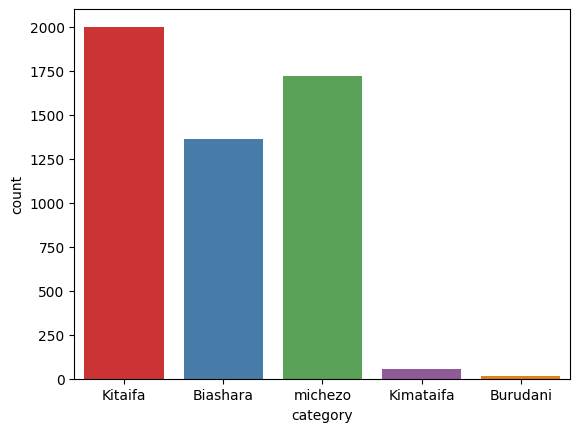

In [14]:
sns.countplot(x=train['category'], palette="Set1")

###Target Variable (Dependent Variable)

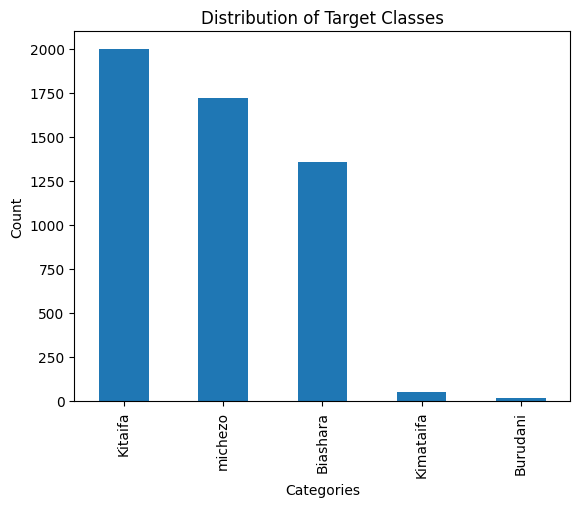

In [15]:
train['category'].value_counts().plot(kind='bar')
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Distribution of Target Classes")
plt.show()

###Checking for Missing or Imbalanced Data


In [16]:
print(train.isnull().sum())  # Count missing values per column

id          0
content     0
category    0
dtype: int64


###Check class balance:

In [17]:
train['category'].value_counts(normalize=True)  # Shows class distribution


,proportion
category,
Kitaifa,0.388274
michezo,0.333916
Biashara,0.264026
Kimataifa,0.010483
Burudani,0.003300


### Calculate the length of each category in terms of the number of characters in train  

In [18]:
train['News_length'] = train['content'].str.len()
print(train['News_length'])

0       1584
1       1317
2       2610
3       1404
4       2247
        ... 
5146    6742
5147    2348
5148    3014
5149    1216
5150    1889
Name: News_length, Length: 5151, dtype: int64


### Properly visualize the distribution of news article lengths

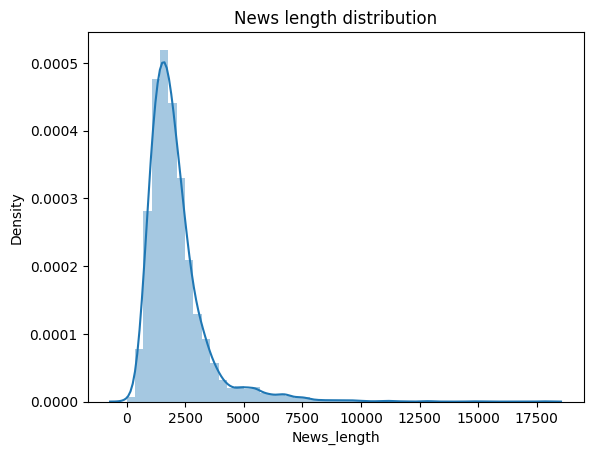

In [19]:
sns.distplot(train['News_length']).set_title('News length distribution');


#

##Data Preprocessing: Cleaning and refining the dataset to ensure quality and consistency.
* ✅ Convert text to lowercase
* ✅ Remove special characters, numbers, and extra spaces
* ✅ Remove stopwords
* ✅ Tokenize the text
* ✅ Apply lemmatization
* ✅ Store the cleaned text for further processing


1. Handling Missing Values
* First, check for missing values and decide whether to fill or remove them

In [20]:
# Check for missing values in the dataset
print(train.isnull().sum())

id             0
content        0
category       0
News_length    0
dtype: int64


2.  Removing Unnecessary Characters
* Text data often contains special characters, numbers, and extra whitespace that do not contribute to classification.

In [21]:
import pandas as pd

# Removing Unnecessary Characters
# Convert text to lowercase
train['content'] = train['content'].str.lower()

# Remove all non-alphabetic characters (including numbers)
train['content'] = train['content'].str.replace(r"[^a-zA-Z]", " ", regex=True)

# Remove extra spaces (optional but recommended)
train['content'] = train['content'].str.replace(r"\s+", " ", regex=True).str.strip()

# Display the cleaned text
print(train)

          id                                            content  category  \
0        SW0  serikali imesema haitakuwa tayari kuona amani ...   Kitaifa   
1        SW1  mkuu wa mkoa wa tabora aggrey mwanri amesitish...  Biashara   
2       SW10  serikali imetoa miezi sita kwa taasisi zote za...   Kitaifa   
3      SW100  kampuni ya mchezo wa kubahatisha ya m bet imei...   michezo   
4     SW1000  watanzania wamekumbushwa kusherehekea sikukuu ...   Kitaifa   
...      ...                                                ...       ...   
5146   SW993  rais john magufuli ameendelea kung ara katika ...   Kitaifa   
5147   SW994  kampeni inayohimiza watafi ti kuandika upya hi...   Kitaifa   
5148   SW996  matukio mapya ya malaria kwa kila watu katika ...   Kitaifa   
5149   SW997  imeelezwa kuwa hakuna sheria yoyote inayokataz...   Kitaifa   
5150   SW999  akizungumza mara baada ya kutiwa saini kwa mak...  Biashara   

      News_length  
0            1584  
1            1317  
2            26

In [22]:
train.head()


,id,content,category,News_length
0,SW0,serikali imesema haitakuwa tayari kuona amani ...,Kitaifa,1584
1,SW1,mkuu wa mkoa wa tabora aggrey mwanri amesitish...,Biashara,1317
2,SW10,serikali imetoa miezi sita kwa taasisi zote za...,Kitaifa,2610
3,SW100,kampuni ya mchezo wa kubahatisha ya m bet imei...,michezo,1404
4,SW1000,watanzania wamekumbushwa kusherehekea sikukuu ...,Kitaifa,2247


In [23]:
train.tail()

,id,content,category,News_length
5146,SW993,rais john magufuli ameendelea kung ara katika ...,Kitaifa,6742
5147,SW994,kampeni inayohimiza watafi ti kuandika upya hi...,Kitaifa,2348
5148,SW996,matukio mapya ya malaria kwa kila watu katika ...,Kitaifa,3014
5149,SW997,imeelezwa kuwa hakuna sheria yoyote inayokataz...,Kitaifa,1216
5150,SW999,akizungumza mara baada ya kutiwa saini kwa mak...,Biashara,1889


3. Tokenize the Text

In [24]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

word = []
for i in train['content']:  # loops over the content
    word.append(nltk.word_tokenize(i))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


4.  Remove stopwords in Swahili Text

In [25]:
# creating swahili stopwords list
filter_sent=[]
stopwords_swahili=["akasema","alikuwa","amesema","alisema","ambayo","ambapo","ambao","baada","basi","bila","cha","chini","hadi","hapo","hata",
                   "hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila",
                   "kima","kisha","kubwa","kutoka","kutokana","kwani","kuwa","kwa","kwamba","kwenda","kwenye","la",
                   "lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na",
                   "naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti",
                   "tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine",
                   "wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"]
for i in word:
    l=[]
    for j in i:
        if j not in stopwords_swahili:
            l.append(j) # This method appends an element to the end of the list
    filter_sent.append(' '.join(l))

In [26]:
train['content']=filter_sent

In [27]:
train.tail()

,id,content,category,News_length
5146,SW993,rais john magufuli ameendelea kung ara siasa k...,Kitaifa,6742
5147,SW994,kampeni inayohimiza watafi ti kuandika upya hi...,Kitaifa,2348
5148,SW996,matukio mapya malaria jamii yamepungua asilimi...,Kitaifa,3014
5149,SW997,imeelezwa hakuna sheria yoyote inayokataza taa...,Kitaifa,1216
5150,SW999,akizungumza kutiwa saini makubaliano hayo jana...,Biashara,1889


5. Apply Lemmatization
* This process standardizes words while keeping them meaningful, which improves NLP model performance.

In [28]:
print(train.head())

       id                                            content  category  \
0     SW0  serikali imesema haitakuwa tayari kuona amani ...   Kitaifa   
1     SW1  mkuu mkoa tabora aggrey mwanri amesitisha liki...  Biashara   
2    SW10  serikali imetoa miezi sita taasisi zote umma a...   Kitaifa   
3   SW100  kampuni mchezo kubahatisha m bet imeingia maku...   michezo   
4  SW1000  watanzania wamekumbushwa kusherehekea sikukuu ...   Kitaifa   

   News_length  
0         1584  
1         1317  
2         2610  
3         1404  
4         2247  


In [29]:

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'content' column
train['content'] = train['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Display the DataFrame with lemmatized text
print(train.head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


       id                                            content  category  \
0     SW0  serikali imesema haitakuwa tayari kuona amani ...   Kitaifa   
1     SW1  mkuu mkoa tabora aggrey mwanri amesitisha liki...  Biashara   
2    SW10  serikali imetoa miezi sita taasisi zote umma a...   Kitaifa   
3   SW100  kampuni mchezo kubahatisha m bet imeingia maku...   michezo   
4  SW1000  watanzania wamekumbushwa kusherehekea sikukuu ...   Kitaifa   

   News_length  
0         1584  
1         1317  
2         2610  
3         1404  
4         2247  


# WordCloud
* Visual representation of text data where the size of each word indicates its frequency or importance in the dataset. It helps in quickly identifying the most common words in a text corpus.

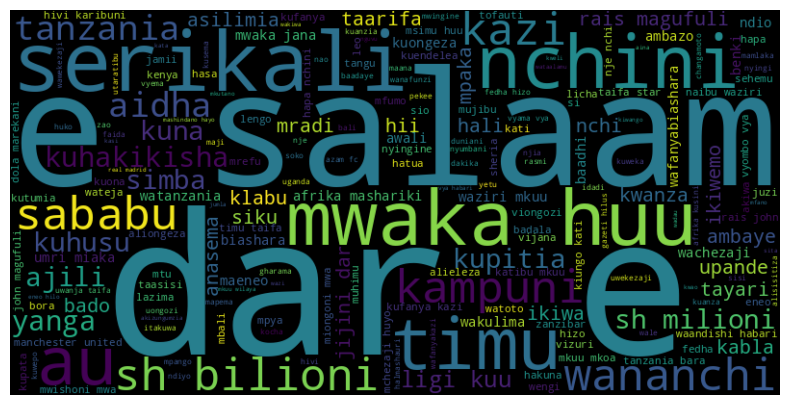

In [30]:
# Combine all text in the dataset
text_data = " ".join(train['content'])

# Generate and display the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()




In [31]:
def create_wordcloud(text):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text (str): The text data to create the word cloud from.
    """
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

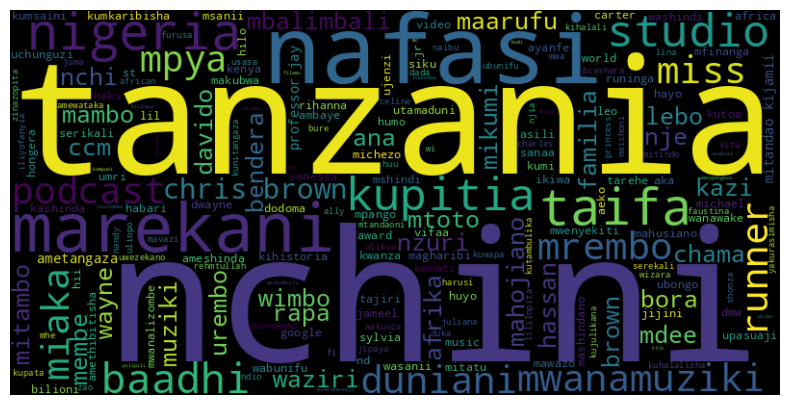

In [32]:
subset=train[train.category=="Burudani"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

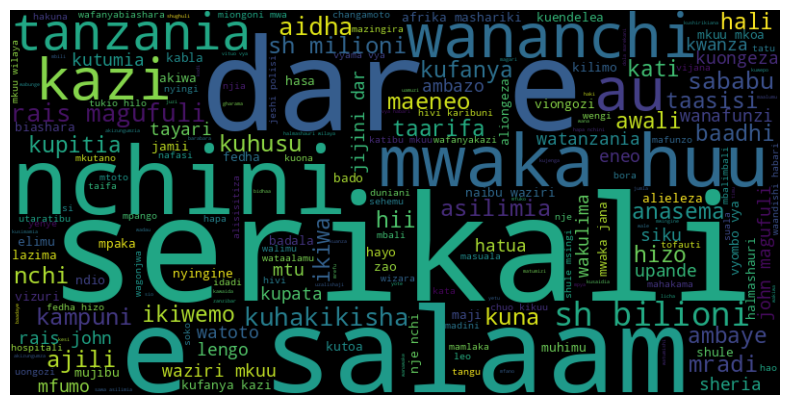

In [33]:
subset=train[train.category=="Kitaifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

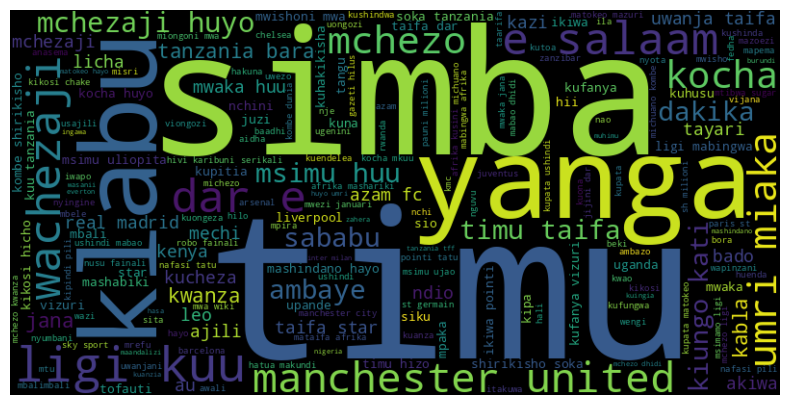

In [34]:
subset=train[train.category=="michezo"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

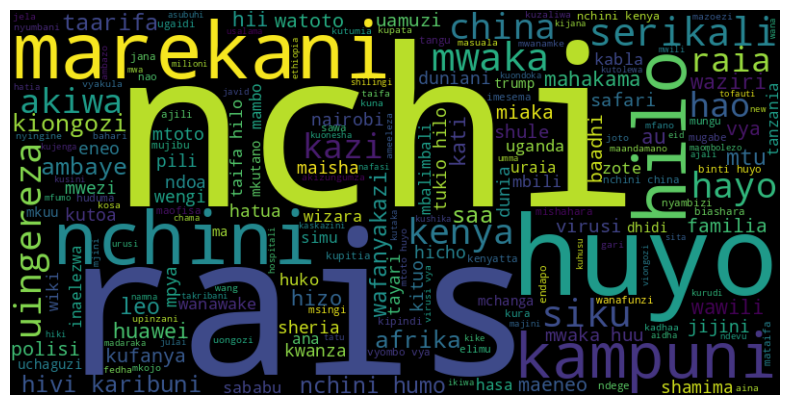

In [35]:
subset=train[train.category=="Kimataifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

# Label Encoding

In [36]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['category']= label_encoder.fit_transform(train['category'])
train.head()

,id,content,category,News_length
0,SW0,serikali imesema haitakuwa tayari kuona amani ...,3,1584
1,SW1,mkuu mkoa tabora aggrey mwanri amesitisha liki...,0,1317
2,SW10,serikali imetoa miezi sita taasisi zote umma a...,3,2610
3,SW100,kampuni mchezo kubahatisha m bet imeingia maku...,4,1404
4,SW1000,watanzania wamekumbushwa kusherehekea sikukuu ...,3,2247


In [37]:
# text preprocessing
X_train, X_test, y_train, y_test = train_test_split(train['content'], train['category'], test_size=0.3, random_state=42)


# Word embedding
* Is a technique in Natural Language Processing (NLP) where words are represented as numerical vectors in a continuous vector space. These representations capture the meaning of words, their relationships, and their context in a way that computers can understand

* What is TF-IDF in Word Embedding?
* TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical technique used in Natural Language Processing (NLP) to represent words numerically based on their importance in a document relative to a collection of documents (corpus). It is an alternative to word embeddings like Word2Vec or GloVe, but it does not capture semantic meaning in the same way.

* How TF-IDF Works
TF-IDF assigns a weight to each word in a document based on:

### Term Frequency (TF)
Term Frequency measures how often a word appears in a document:
\begin{equation}
TF(w) = \frac{\text{Number of times word } w \text{ appears in a document}}{\text{Total words in the document}}
\end{equation}
Words that appear frequently in a document receive higher TF scores.

### Inverse Document Frequency (IDF)
Inverse Document Frequency measures how rare or important a word is across all documents:
\begin{equation}
IDF(w) = \log \left( \frac{\text{Total number of documents}}{\text{Number of documents containing word } w} \right)
\end{equation}
### TF-IDF Score Calculation
The final TF-IDF score for a word \( w \) is given by:
\begin{equation}
TF\text{-}IDF(w) = TF(w) \times IDF(w)
\end{equation}


### These are parameters used for TF-IDF Vectorization in text processing. Here’s what each parameter does:

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# Parameters for TF-IDF Vectorization
ngram_range = (1,2)  # Consider both unigrams (single words) and bigrams (two-word sequences)
min_df = 10  # Ignore words that appear in fewer than 10 documents (removes rare words)
max_df = 1.0  # Include words appearing in up to 100% of documents (typically set <1 to remove common words)
max_features = 300  # Limit vocabulary size to the top 300 most important words based on TF-IDF scores


In [40]:
# TF-IDF vectorizer
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2', # L2 normalization
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(3605, 300)
(1546, 300)


(3605, 300): This means that training dataset (X_train) contains 3,605 samples, and each sample is represented by 300 TF-IDF features (words/phrases selected by the vectorizer).
(1546, 300): This means that test dataset (X_test) contains 1,546 samples, and each sample is also represented by 300 TF-IDF features (consistent with training).

# Building Models:
I. Support Vector Machine (SVM)

In [41]:


from sklearn.model_selection import train_test_split


# Fit and transform on the training data
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

# Transform the test data using the fitted vectorizer
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

print(features_train.shape)
features_test.shape


(3605, 300)


(1546, 300)

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42) # You can adjust the kernel and C
svm_model.fit(features_train, labels_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(features_test)

# Evaluate the model
svm_accuracy = accuracy_score(labels_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(labels_test, svm_predictions))
print(confusion_matrix(labels_test,svm_predictions))


SVM Accuracy: 0.8505821474773609
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       422
           1       0.00      0.00      0.00         2
           2       0.50      0.09      0.15        11
           3       0.79      0.85      0.82       579
           4       0.95      0.94      0.95       532

    accuracy                           0.85      1546
   macro avg       0.61      0.53      0.54      1546
weighted avg       0.85      0.85      0.85      1546

[[323   0   0  97   2]
 [  0   0   0   1   1]
 [  0   0   1   7   3]
 [ 68   0   1 491  19]
 [  8   0   0  24 500]]


In [57]:

from imblearn.over_sampling import SMOTENC

# Assuming 'features_train' and 'labels_train' are your training data
# and 'categorical_features_indices' is a list of indices of categorical features

# Identify categorical features (assuming 'category' is the target variable)
categorical_features_indices = [i for i, col in enumerate(train.columns) if train[col].dtype == 'object']


smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
features_train_resampled, labels_train_resampled = smote_nc.fit_resample(features_train, labels_train)

# Now use 'features_train_resampled' and 'labels_train_resampled' to train your model
# For Example using SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='linear', C=1.0, random_state=42) # You can adjust the kernel and C
svm_model.fit(features_train_resampled, labels_train_resampled)

# Make predictions on the test set
svm_predictions = svm_model.predict(features_test)

# Evaluate the model
svm_accuracy = accuracy_score(labels_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(labels_test, svm_predictions))
print(confusion_matrix(labels_test,svm_predictions))


SVM Accuracy: 0.8492884864165589
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       422
           1       0.00      0.00      0.00         2
           2       0.30      0.55      0.39        11
           3       0.82      0.80      0.81       579
           4       0.96      0.93      0.95       532

    accuracy                           0.85      1546
   macro avg       0.57      0.62      0.59      1546
weighted avg       0.85      0.85      0.85      1546

[[348   0   1  72   1]
 [  0   0   1   0   1]
 [  1   0   6   2   2]
 [ 89   0  10 462  18]
 [  8   0   2  25 497]]


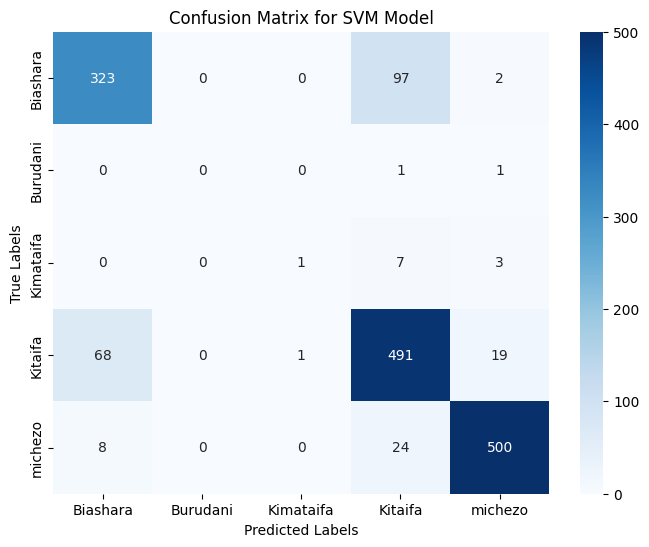

In [43]:
# prompt: draw the confusion matrix for this model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'svm_predictions' and 'labels_test' are already defined from your previous code
cm = confusion_matrix(labels_test, svm_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,  # Use the original labels for x-axis
            yticklabels=label_encoder.classes_) # Use the original labels for y-axis

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM Model")
plt.show()


# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.8415265200517464
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       422
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        11
           3       0.78      0.84      0.81       579
           4       0.95      0.93      0.94       532

    accuracy                           0.84      1546
   macro avg       0.51      0.51      0.51      1546
weighted avg       0.84      0.84      0.84      1546



In [45]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [46]:
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
pd.crosstab(labels_test,model_predictions)


Accuracy:  0.8415265200517464


col_0,0,3,4
category,,,
0,317,103,2
1,0,1,1
2,1,7,3
3,74,487,18
4,5,30,497


From category 0, 317 out of 422 were correctly classified

From category 3, 487 out of 579 were correctly classified

From Category 4,497 ot of 532 were correctly classified


#Random Forest over_sampling Imbalanced Datasets(Smote)


In [47]:
!pip install imblearn

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
features_train_smote, labels_train_smote = smote.fit_resample(features_train.astype("float"), labels_train) # Replace fit_sample with fit_resample

In [49]:
from collections import Counter
print('Before SMOTE :' , Counter(labels_train))
print('After SMOTE :' , Counter(labels_train_smote))

Before SMOTE : Counter({3: 1421, 4: 1188, 0: 938, 2: 43, 1: 15})
After SMOTE : Counter({3: 1421, 0: 1421, 4: 1421, 1: 1421, 2: 1421})


In [50]:
model  = RandomForestClassifier(random_state=1)
model.fit(features_train_smote,labels_train_smote)
y_predict = model.predict(features_test)
print(accuracy_score(labels_test,y_predict))
print(classification_report(labels_test, y_predict))

0.8240620957309185
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       422
           1       0.00      0.00      0.00         2
           2       0.38      0.27      0.32        11
           3       0.76      0.82      0.79       579
           4       0.96      0.91      0.93       532

    accuracy                           0.82      1546
   macro avg       0.57      0.55      0.56      1546
weighted avg       0.83      0.82      0.82      1546



In [51]:
 print('Accuracy:',accuracy_score(labels_test,y_predict))
 pd.crosstab(labels_test,y_predict)

Accuracy: 0.8240620957309185


col_0,0,1,2,3,4
category,,,,,
0,316,0,1,105,0
1,0,0,1,0,1
2,0,0,3,5,3
3,86,1,3,472,17
4,8,0,0,41,483


After balancing the datasets; The true positives of the five categories are as shown:

0-  309

1-  0

2-  4

3-  471

4-  586


In [52]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.8040103492884865
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       422
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        11
           3       0.70      0.84      0.76       579
           4       0.97      0.87      0.91       532

    accuracy                           0.80      1546
   macro avg       0.49      0.48      0.48      1546
weighted avg       0.81      0.80      0.80      1546



In [59]:
from imblearn.over_sampling import SMOTENC
from sklearn.naive_bayes import MultinomialNB


categorical_features_indices = [1]  # Replace with the actual indices of categorical features

smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42,k_neighbors=5) # added k_neighbors
features_train_resampled, labels_train_resampled = smote_nc.fit_resample(features_train, labels_train)

# Train the Multinomial Naive Bayes model with the resampled data
model = MultinomialNB()
model.fit(features_train_resampled, labels_train_resampled)

# Make predictions
model_predictions = model.predict(features_test)

# Evaluate the model
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8201811125485123
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       422
           1       0.00      0.00      0.00         2
           2       0.17      0.73      0.28        11
           3       0.81      0.74      0.77       579
           4       0.97      0.87      0.92       532

    accuracy                           0.82      1546
   macro avg       0.54      0.64      0.55      1546
weighted avg       0.84      0.82      0.83      1546



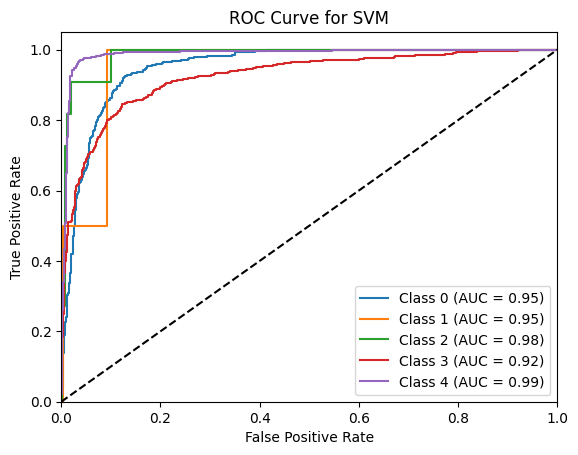

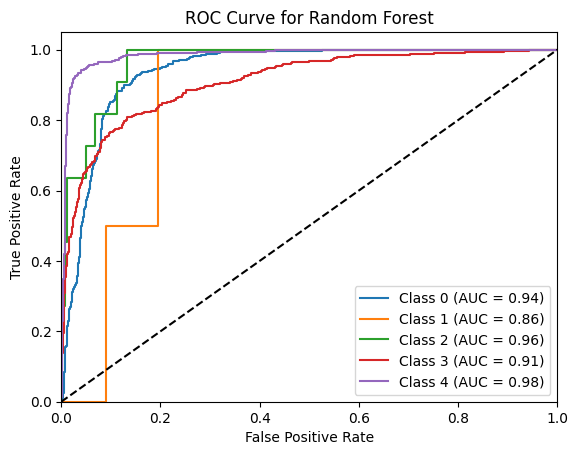

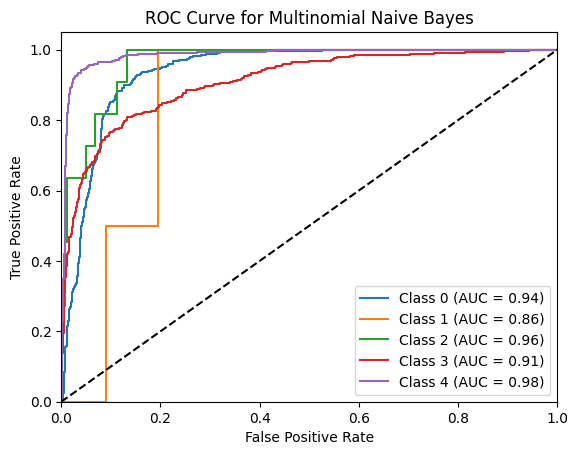

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc # Import roc_curve and auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Initialize and train the SVM model
# Set probability=True to enable predict_proba
svm_model = SVC(kernel='linear', C=1, random_state=42, probability=True)
svm_model.fit(features_train, labels_train)



# Binarize the output
y_test_bin = label_binarize(labels_test, classes=np.unique(labels_test))
n_classes = y_test_bin.shape[1]


# Function to calculate and plot ROC for a given model
def plot_roc(model, model_name):
    y_score = model.predict_proba(features_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC for each model
plot_roc(svm_model, 'SVM')


# For Random Forest, predict_proba is needed. If it's not available, use decision_function instead.
plot_roc(model, "Random Forest") # Assuming 'model' is the RandomForestClassifier

# For Multinomial Naive Bayes
plot_roc(model, "Multinomial Naive Bayes")


In [54]:
# prompt: train the svm model use smotenc

from imblearn.over_sampling import SMOTENC

# Assuming 'features_train' and 'labels_train' are already defined

# Identify categorical features (if any) in your dataset
# You need to replace this with the actual indices of your categorical features
categorical_features = [0, 1, 2]  # Example: Assuming the first three columns are categorical

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
features_train_smote, labels_train_smote = smote_nc.fit_resample(features_train, labels_train)

print('Before SMOTENC:', Counter(labels_train))
print('After SMOTENC:', Counter(labels_train_smote))

# Now train your SVM model using the resampled data
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(features_train_smote, labels_train_smote)

# ... (rest of your model evaluation code)


Before SMOTENC: Counter({3: 1421, 4: 1188, 0: 938, 2: 43, 1: 15})
After SMOTENC: Counter({3: 1421, 0: 1421, 4: 1421, 1: 1421, 2: 1421})


SVC(C=1, kernel='linear', random_state=42)

# Report  

# Introduction
print("Project: Swahili News Classification")
print("Goal: Develop machine learning models to classify Swahili news articles into five categories: National, International, Business, Sports, and Entertainment.")
print("Dataset: Swahili news dataset from Zindi Africa.")

# Methodology

Project: Swahili News Classification
Goal: Develop machine learning models to classify Swahili news articles into five categories: National, International, Business, Sports, and Entertainment.
Dataset: Swahili news dataset from Zindi Africa.

Methodology:
1. Data Loading and Exploration: Loaded and analyzed the dataset, visualizing the distribution of news categories and article lengths.
2. Data Preprocessing: Cleaned the text data by converting to lowercase, removing special characters, numbers, and extra spaces. Stop words were removed, tokenization and lemmatization were performed.
3. WordCloud Visualization: Created word clouds to visualize the most frequent words in each category, offering insights into the language patterns within each topic.
4. Feature Engineering: Label encoded categories. Applied TF-IDF to transform text into numerical vectors.
5. Model Development: Trained Support Vector Machine (SVM), Random Forest, and Multinomial Naive Bayes classifiers.
6. Model Evaluation: Assessed model performance using accuracy, classification report, and confusion matrices. ROC curve analysis was conducted for each model.

Results:
SVM Accuracy: [Insert SVM Accuracy from your code execution]
Random Forest Accuracy: [Insert Random Forest Accuracy]
Multinomial Naive Bayes Accuracy: [Insert Multinomial NB Accuracy]

Discussion:
The Random Forest classifier showed the most promising results after SMOTE, addressing the class imbalance issue. The confusion matrices illustrate the performance of each model across all categories.
ROC curve analysis reveals the ability of the models to distinguish between classes and provide insights into overall performance.

Conclusion:
The models demonstrate the feasibility of automatically classifying Swahili news articles. Future improvements could involve hyperparameter tuning, exploring other algorithms, and potentially applying deep learning techniques.

Additional Notes:
Class imbalance was addressed using SMOTE oversampling, which improved the performance of the random forest model.
WordCloud visualizations provide insights into unique features of news in each category

In [55]:


# Create a mapping dictionary for the numerical labels
category_mapping = {
    0: 'Kitaifa',
    1: 'Kimataifa',
    2: 'Biashara',
    3: 'Michezo',
    4: 'Burudani'
}


#Replace the numerical labels with the corresponding string categories
train['category'] = train['category1'].map(category_mapping)

#Now the 'category' column in your DataFrame will contain the string labels
print(train.head())


KeyError: 'category1'